# White Wine Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model

In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C823-5BE5

 Directory of C:\Users\Disha Umat\Desktop\data science

06-06-2020  14:46    <DIR>          .
06-06-2020  14:46    <DIR>          ..
06-06-2020  14:38    <DIR>          .ipynb_checkpoints
13-05-2020  16:56           143,261 1.ipynb
09-04-2020  12:12    <DIR>          avocado-prices
07-04-2020  22:40           643,781 avocado-prices.zip
17-04-2020  01:38            23,929 canada_income.ipynb
17-04-2020  00:35               826 canada_per_capita_income.csv
05-05-2020  19:25    <DIR>          diabetes
03-05-2020  13:07           158,422 diabetes prediction.ipynb
17-04-2020  22:33            23,873 diabetes_data.csv
03-05-2020  13:27           169,743 diabetes_umat.ipynb
07-04-2020  23:16             9,515 price1.ipynb
05-05-2020  19:16           560,683 Red wine analysis_divyanshu.ipynb
05-05-2020  19:22           827,068 red_wine_analysis_umat.ipynb
17-04-2020  22:40                 0 untitled
07-04-2020  23:16            

## loading dataset 
###### *using read_csv() from pandas library to load data

In [3]:
dataset=pd.read_csv('winequality-white.csv',sep=';')

###### head() function from pandas is used to get the entry of n rows 
###### by deafault head() functon is used to read first five rows 
###### indexing of rows start with 0

In [4]:
dataset.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


###### shape is used to get the number of rows and columns present in the data
###### from list we get the names of the columns present in the dataset

In [5]:
print(dataset.shape)
a=list(dataset)
print(a)

(4898, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


###### from above we get to know that we have 1599 rows and 12 columns present in the dataset where rows are considered to be entries and columns are considered to be features

In [6]:
# to get the information about each column/attribute
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


###### from info() we came to know that all 12 columns have numeric values

###### from above we came to know that 11 features are independent and 1 feature "quality" is dependent feature

In [7]:
# to know summary of dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


######  summary of white wine dataset  seems to be perfect, there is no negatie or invalid data present in it

In [8]:
# to vheck for null values in the dataset
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### The white wine dataset doesn't have any missing values for any of the feature. It seems that data has been collected neatly 

#### Check if there's any 0's present in the data 

In [9]:
dataset.isin([0]).sum()

fixed acidity            0
volatile acidity         0
citric acid             19
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

### We need to fill these 0's with some appropirate values

In [10]:
dataset=dataset.replace({'citric acid' : 0,},np.NaN)                     


dataset.isin([0]).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Mean of citric acid

In [11]:
dataset['citric acid'].mean()

0.3354929288788621

### Replace this NaN with mean

In [12]:
dataset['citric acid'].isnull().sum()

19

In [13]:
dataset=dataset.fillna(dataset['citric acid'].mean())
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### About target feature "quality"

In [14]:
# here quality is a target feature and we are checking for the unique values for the quality feature
dataset['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [15]:
# to count number of data present in each value unique value of quality
dataset.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

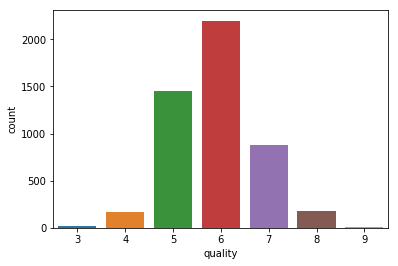

In [16]:
sns.countplot(x='quality',data=dataset)

###### The above distribution shows the range for response variable (quality) is between 3 to 8.

###### Let's create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable. i.e.
      bad: 1-4
      average: 5-6
      good: 7-10

In [20]:
conditions=[(dataset['quality']<=4),(dataset['quality']>=7)]
rating=['low','high']
dataset['rating']=np.select(conditions,rating,default='medium')
dataset.rating.value_counts()

medium    3655
high      1060
low        183
Name: rating, dtype: int64

In [21]:
dataset.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
high,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528
low,7.180874,0.375984,0.318705,4.821038,0.050557,26.633880,130.232240,0.994343,3.183388,0.475956,10.173497,3.890710
medium,6.876060,0.277086,0.339070,6.797729,0.047740,35.962107,142.571272,0.994480,3.180720,0.487557,10.269808,5.601368


## Visualize data through plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C2BD3AD048>,
      dtype=object)

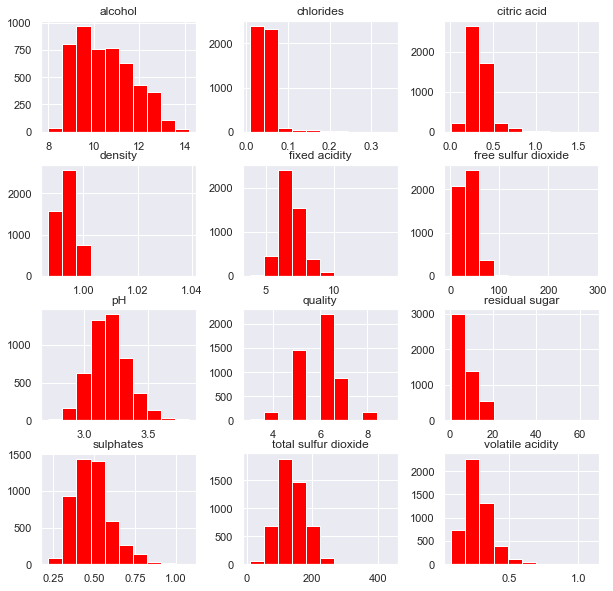

In [22]:
sns.set()
dataset.hist(figsize=(10,10), color='red')


## correlation between features/variables:

 ##### Let's check the corelation between the target variable and predictor variables

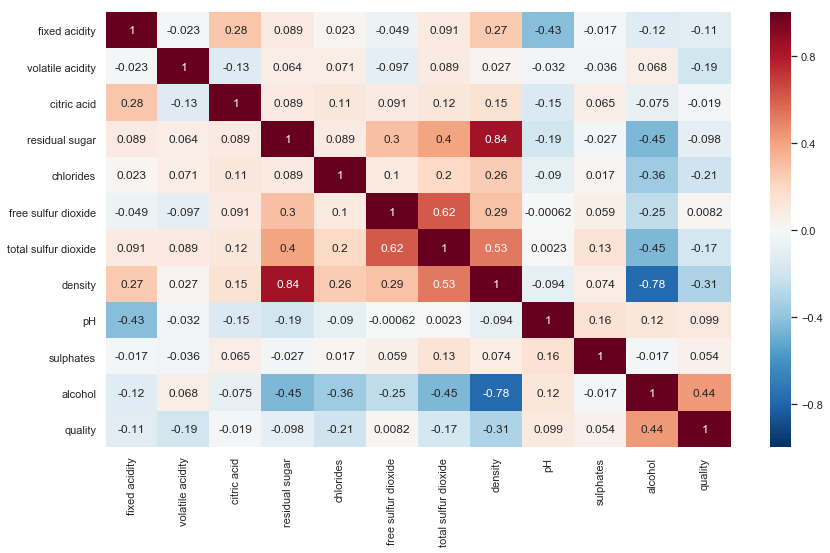

In [23]:
correlation=dataset.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,linewidths=0,vmin=-1,cmap='RdBu_r')

In [24]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.018875
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

###### We can observe that, the 'alcohol, sulphates, citric_acid & fixed_acidity' have maximum corelation with response variable 'quality'.
###### This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

In [25]:
dataset.groupby('rating').describe()

fixed acidity                                                 \
               count      mean       std  min  25%  50%   75%   max   
rating                                                                
high          1060.0  6.725142  0.768798  3.9  6.2  6.7  7.20   9.2   
low            183.0  7.180874  1.171885  4.2  6.4  6.9  7.65  11.8   
medium        3655.0  6.876060  0.839049  3.8  6.3  6.8  7.40  14.2   

       volatile acidity            ... alcohol       quality            \
                  count      mean  ...     75%   max   count      mean   
rating                             ...                                   
high             1060.0  0.265349  ...    12.4  14.2  1060.0  7.174528   
low               183.0  0.375984  ...    10.8  13.5   183.0  3.890710   
medium           3655.0  0.277086  ...    11.0  14.0  3655.0  5.601368   

                                           
             std  min  25%  50%  75%  max  
rating                                     
high    0.391978  7.0  7.0  7.0  7.0  9.0  
low     0.312858  3.0  4.0  4.0  4.0  4.0  
medium  0.489684  5.0  5.0  6.0  6.0  6.0  

[3 rows x 96 columns]

## Analysis of Quality & Alcohol:

[Text(0, 0.5, 'alcohol'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'alcohols in different types of Wine ratings')]

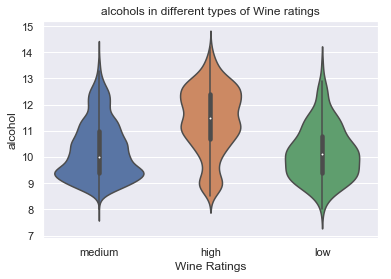

In [26]:
bx = sns.violinplot(x="rating", y='alcohol', data = dataset)
bx.set(xlabel='Wine Ratings', ylabel='alcohol', title='alcohols in different types of Wine ratings')

## Analysis of sulphates & ratings:

[Text(0, 0.5, 'sulphates'),
 Text(0.5, 0, 'rating dataset'),
 Text(0.5, 1.0, 'sulphates in different types of dataset ratings')]

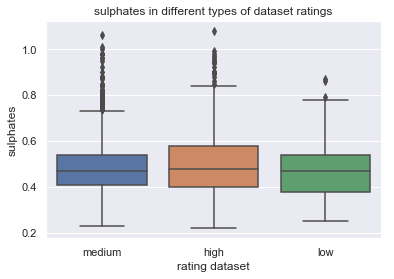

In [27]:
bx=sns.boxplot(x='rating',y='sulphates',data=dataset)
bx.set(xlabel='rating dataset', ylabel='sulphates', title='sulphates in different types of dataset ratings')

## Analysis of Citric Acid & ratings:

[Text(0, 0.5, 'citric acid'),
 Text(0.5, 0, 'dataset ratings'),
 Text(0.5, 1.0, 'citric acid in different dataset quality types')]

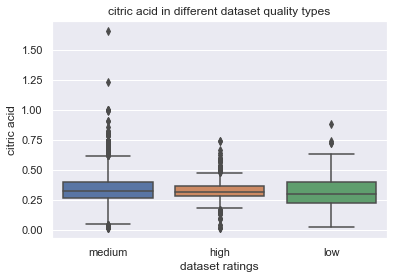

In [28]:
bx=sns.boxplot(x='rating',y='citric acid',data=dataset)
bx.set(xlabel='dataset ratings', ylabel='citric acid', title='citric acid in different dataset quality types')

## Analysis of Fixed Acidity & ratings:

[Text(0, 0.5, 'fixed acidity'),
 Text(0.5, 0, 'dataset ratings'),
 Text(0.5, 1.0, 'fixed acidity in different dataset quality types')]

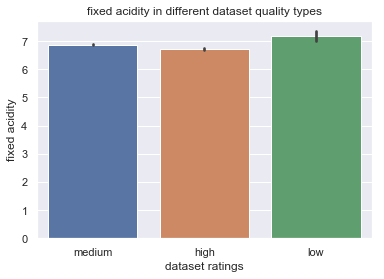

In [29]:
bx=sns.barplot(x='rating',y='fixed acidity',data=dataset)
bx.set(xlabel='dataset ratings', ylabel='fixed acidity', title='fixed acidity in different dataset quality types')

## Analysis of pH & ratings:

[Text(0, 0.5, 'pH'),
 Text(0.5, 0, 'dataset ratings'),
 Text(0.5, 1.0, 'pH in different dataset quality types')]

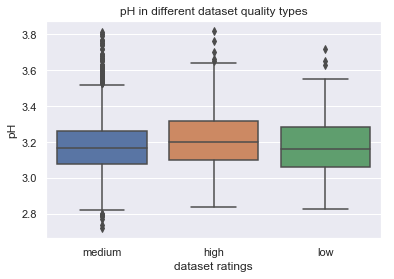

In [30]:
bx=sns.boxplot(x='rating',y='pH',data=dataset)
bx.set(xlabel='dataset ratings', ylabel='pH', title='pH in different dataset quality types')

## Analysis of Residual Sugar & ratings:

[Text(0, 0.5, 'residual sugar'),
 Text(0.5, 0, 'dataset ratings'),
 Text(0.5, 1.0, 'residual sugar in different dataset quality types')]

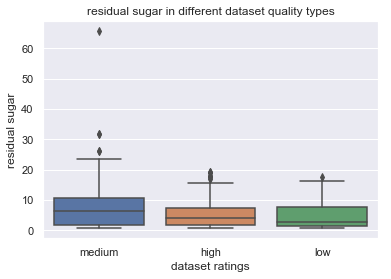

In [31]:
bx=sns.boxplot(x='rating',y='residual sugar',data=dataset)
bx.set(xlabel='dataset ratings', ylabel='residual sugar', title='residual sugar in different dataset quality types')

## Analysis of Free Sulphur Dioxide & ratings:

[Text(0, 0.5, 'free sulfur dioxide'),
 Text(0.5, 0, 'dataset ratings'),
 Text(0.5, 1.0, 'free sulfur dioxide in different dataset quality types')]

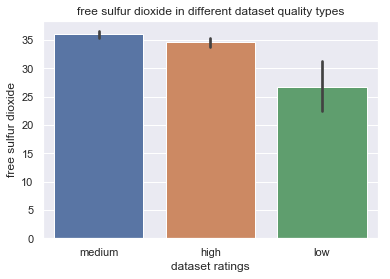

In [32]:
bx=sns.barplot(x='rating',y='free sulfur dioxide',data=dataset)
bx.set(xlabel='dataset ratings', ylabel='free sulfur dioxide', title='free sulfur dioxide in different dataset quality types')

## Analysis of Chlorides & ratings:

[Text(0, 0.5, 'chlorides'),
 Text(0.5, 0, 'dataset ratings'),
 Text(0.5, 1.0, 'chlorides in different dataset quality types')]

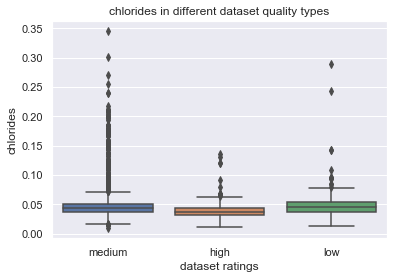

In [33]:
bx=sns.boxplot(x='rating',y='chlorides',data=dataset)
bx.set(xlabel='dataset ratings', ylabel='chlorides', title='chlorides in different dataset quality types')

## Analysis of Density & ratings:

[Text(0, 0.5, 'density'),
 Text(0.5, 0, 'dataset ratings'),
 Text(0.5, 1.0, 'density in different dataset quality types')]

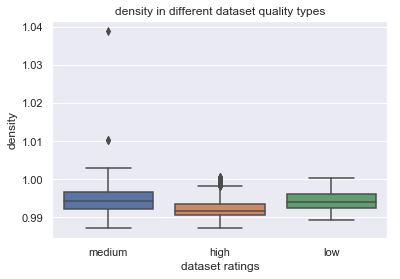

In [34]:
bx=sns.boxplot(x='rating',y='density',data=dataset)
bx.set(xlabel='dataset ratings', ylabel='density', title='density in different dataset quality types')

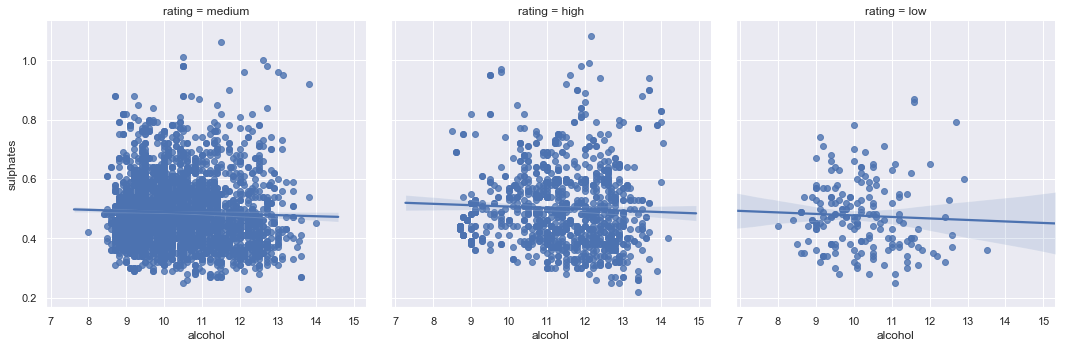

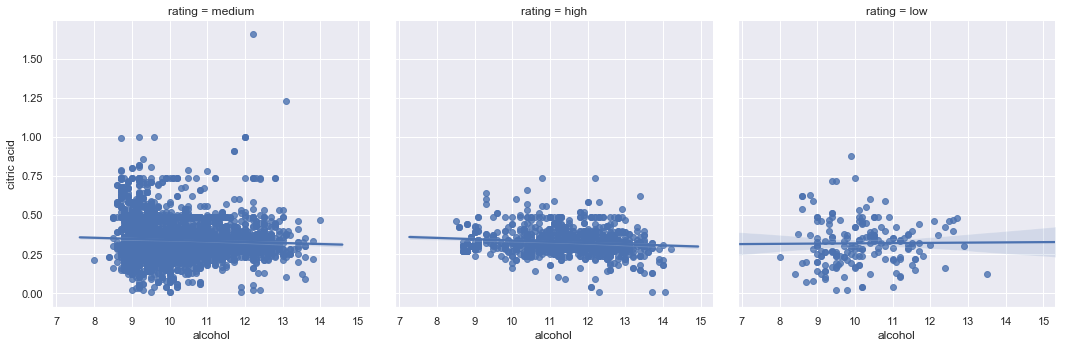

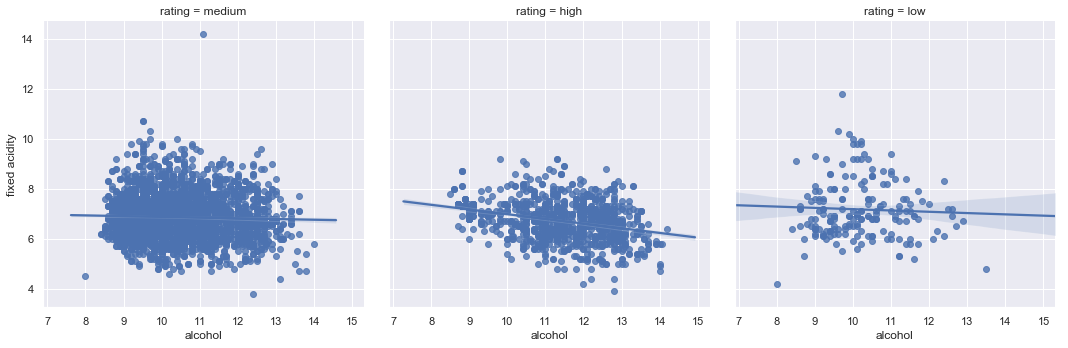

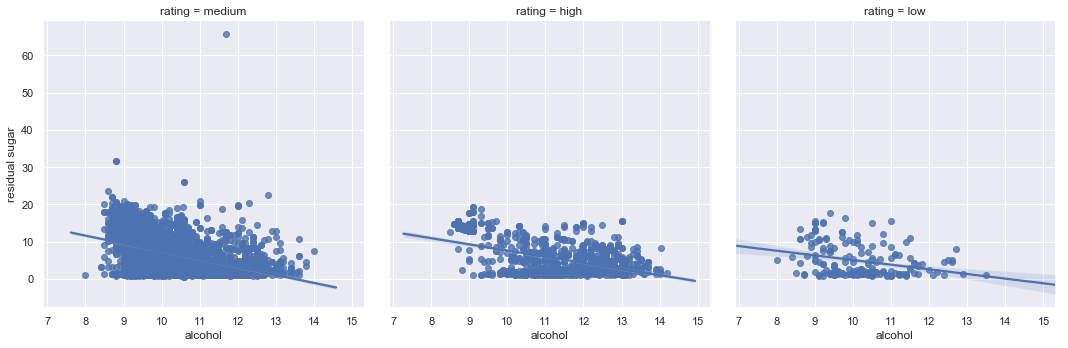

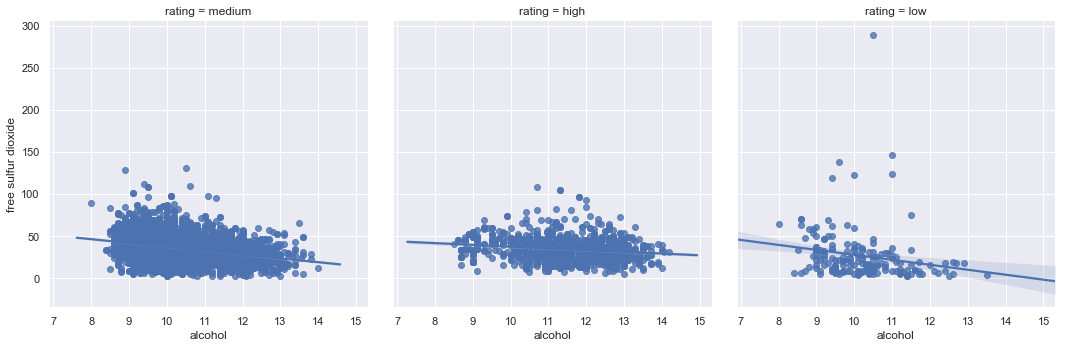

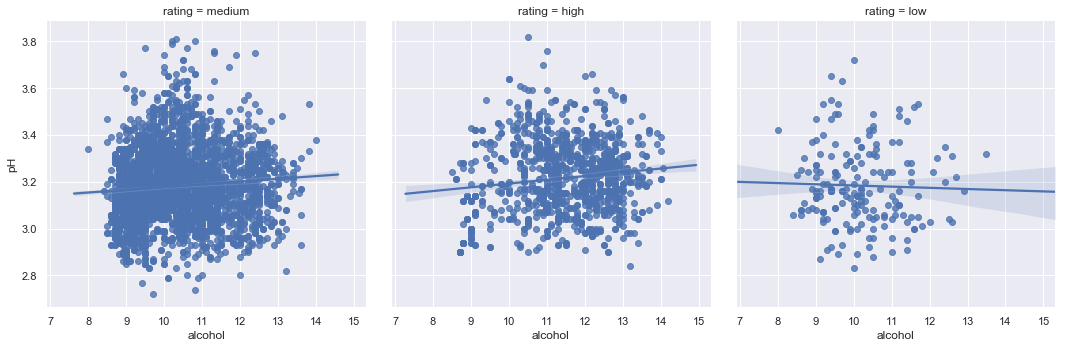

In [35]:
d=["sulphates","citric acid","fixed acidity","residual sugar","free sulfur dioxide","pH"]
for i in d:
    sns.lmplot(x="alcohol",y=i,col="rating",data=dataset)

### The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and other features of  content of the white wine.

In [36]:
dataset['code_rate']=(dataset['quality']>4).astype(np.float32)

## Classification

### LogisticRegression:

In [37]:
X=dataset[['alcohol','sulphates','citric acid','fixed acidity','residual sugar','free sulfur dioxide','pH']]
Y=dataset['code_rate']


In [38]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X, Y)
yhat = model.predict(X)
print(yhat)
print(sklearn.metrics.classification_report(Y, yhat))

[1. 1. 1. ... 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       183
         1.0       0.96      1.00      0.98      4715

   micro avg       0.96      0.96      0.96      4898
   macro avg       0.48      0.50      0.49      4898
weighted avg       0.93      0.96      0.94      4898



#### The accuracy matrix for sklearn's linear regression model for white wine quality prediction shows the overall 96%.
#### Also the precision for good wine (1) prediction is almost 96%.
#### But the precision is almost 0% for the bad type of wine (0) with sklearn's linear regression model. Which is not a good sign for the analysis.

### RandomForestClassifier:

In [39]:
y, X = dmatrices('code_rate~ alcohol', data = dataset)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       183
         1.0       0.96      1.00      0.98      4715

   micro avg       0.96      0.96      0.96      4898
   macro avg       0.48      0.50      0.49      4898
weighted avg       0.93      0.96      0.94      4898



#### Here, with the accuracy matrix for sklearn's random forest classifier model for the prediction of white wine quality, we can observe that the values have been improved significantly.
#### The precision for the prediction of bad quality wine (0) is almost 100% where as the precision for prediction of good quality wine (1) is approximately 96%.
#### This sklearn's random forest classifier model also has the overall precision around 96%, which is far better than the previous  model ( sklearn's linear regression model)

# Conclusion:

### We observed the key factors that determine and affects the quality of the white wine. Wine quality is ultimately a subjective measure. The ordered factor 'quality' was not very helpful and to overcome this, so we created another variable called 'rating'.
### To make predictions of wine quality and any other if required, we trained two models. As seen, the Sklearn's Random Forest Classifier and  sklearn's Linear Regression model along with  Decision Tree Classifier model. The  Decision Tree Classifier model performed marginally better and we decided to stick with it if we had to make any more predictions.
### The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.